In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##### The data key has the actual data with one row per instance and one column per feature.
##### The target key contains an array with the labels.

In [7]:
X, y = mnist['data'], mnist['target']

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

##### A single picture has 28 x 28 pixels, hence there are total 784 features. Each feature simply represents one pixel's intensity, from 0 (white) to 1 (black)

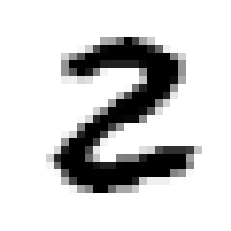

In [49]:
#Let's try to visualize one digit from the dataset.

import matplotlib.pyplot as plt

some_digit = X[25]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis("off")
plt.show()